<h1><b>Tiền xử lý dữ liệu</b></h1>



***import***

In [31]:
import pandas 
import json 
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import numpy as np
import time
import datetime

***Hàm xử lý***: xử lý data chuyển dict quote thành list dict riêng

In [32]:
def xuly(id,name,symbol,quotes):
    value={}
    value['id']=id
    value['name']=name
    value['symbol']=symbol
    
    for i in quotes:
        if(i=='quote'):continue
        value[i]=quotes[i]
    tmp= quotes['quote']
    for j in tmp:
        value[j]=tmp[j]
    return value
def xuly_data(listquotes):
    value=[]
    for i in listquotes:
        for j in i[3]:
            value.append(xuly(i[0],i[1],i[2],j))
    return value
        
        

***Hàm get address data***

In [33]:
def get_address_data():
    path_to_year='./data/historical-data'
    list_path_to_year=[path_to_year+'/'+path+'/'+'coin-id-1' for path in os.listdir(path_to_year)]
    Top_ID=json.load(open('data/listings-latest.json','r'))
    Top_10_ID=[Top_ID[i]['id'] for i in range(10) ]
    list_id=[i for i in  os.listdir(path_to_year+'/'+'2021') if i.endswith('.json')==False]
    for i in sorted(list_id,key= lambda x: int(x.split('-')[2])):
        if i.endswith('.json')==False and i!='coin-id-9776' and i!='coin-id-10063' and i!='coin-id-1' and int(i.split('-')[2]) in Top_10_ID:
            list_path_to_year.append(path_to_year+'/2021/'+i)
    list_path=[]
    for i in list_path_to_year:
        for path in os.listdir(i):
            if path.endswith('.json'):
                list_path.append(i+'/'+path)
    return list_path



***Get data***

In [34]:
data_coin_history_by_id=[]
list_path=get_address_data()
for i in list_path:
    data_tmp=json.load(open(i,'r'))
    if(len(data_tmp['quotes'])!=0):
        tmp=[]
        tmp.append(data_tmp['id'])
        tmp.append(data_tmp['name'])
        tmp.append(data_tmp['symbol'])
        tmp.append(data_tmp['quotes'])
        data_coin_history_by_id.append(tmp)




***Hàm xử lý ngày giờ***: hàm chuyển ngày giờ thành giờ hoặc ngày tùy từng thuộc tính của từng cột 

In [35]:
def xuly_ngay_gio_to_gio(object):
    tmp=object.split('T')[1]
    return tmp[0:8]
def xuly_ngay_gio_to_ngay(object):
    tmp=object.split('T')[0]
    return tmp



***Hàm xử lý data fit mô hình***

In [36]:
#xuly_data(data_coin_history_by_id)
data_=pandas.DataFrame(xuly_data(data_coin_history_by_id))
for i in data_.keys():
    data_=data_[data_[i]!=0]

del data_['timeOpen']
del data_['timeClose']
data_['date']=''
data_["timeHigh"] = data_["timeHigh"].apply(xuly_ngay_gio_to_gio)
data_["timeLow"] = data_["timeLow"].apply(xuly_ngay_gio_to_gio)
data_["date"] = data_["timestamp"].apply(xuly_ngay_gio_to_ngay)
del data_['timestamp']
data_

,id,name,symbol,timeHigh,timeLow,open,high,low,close,volume,marketCap,date
243,1,Bitcoin,BTC,00:51:02,19:11:01,763.280029,777.510010,713.599976,735.070007,4.686270e+07,8.955395e+09,2013-12-27
244,1,Bitcoin,BTC,12:06:01,18:11:01,737.979980,747.059998,705.349976,727.830017,3.250580e+07,8.869919e+09,2013-12-28
245,1,Bitcoin,BTC,21:46:02,04:41:01,728.049988,748.609985,714.440002,745.049988,1.901130e+07,9.082104e+09,2013-12-29
246,1,Bitcoin,BTC,20:46:02,00:51:01,741.349976,766.599976,740.239990,756.130005,2.070770e+07,9.217168e+09,2013-12-30
247,1,Bitcoin,BTC,00:56:02,04:26:02,760.320007,760.580017,738.169983,754.010010,2.089730e+07,9.191325e+09,2013-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...
6450,4687,Binance USD,BUSD,02:48:16,21:05:09,0.999947,1.001915,0.998003,0.998266,4.014465e+09,1.460783e+10,2021-12-27
6451,4687,Binance USD,BUSD,00:10:14,14:35:08,0.999339,1.001974,0.998054,1.000195,5.062403e+09,1.463606e+10,2021-12-28
6452,4687,Binance USD,BUSD,13:55:08,22:19:15,1.000172,1.001991,0.998038,1.000191,4.663996e+09,1.463599e+10,2021-12-29
6453,4687,Binance USD,BUSD,20:09:12,09:28:11,1.000339,1.001961,0.998052,1.000047,3.751272e+09,1.463389e+10,2021-12-30


# Visualizations

In [37]:
data_.shape

(6212, 12)

In [38]:
data_.columns

Index(['id', 'name', 'symbol', 'timeHigh', 'timeLow', 'open', 'high', 'low',
       'close', 'volume', 'marketCap', 'date'],
      dtype='object')

In [39]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6212 entries, 243 to 6454
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6212 non-null   int64  
 1   name       6212 non-null   object 
 2   symbol     6212 non-null   object 
 3   timeHigh   6212 non-null   object 
 4   timeLow    6212 non-null   object 
 5   open       6212 non-null   float64
 6   high       6212 non-null   float64
 7   low        6212 non-null   float64
 8   close      6212 non-null   float64
 9   volume     6212 non-null   float64
 10  marketCap  6212 non-null   float64
 11  date       6212 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 630.9+ KB


In [40]:
data_.mean()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15792\3735203571.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_.mean()


id           1.047055e+03
open         4.816951e+03
high         4.950746e+03
low          4.670623e+03
close        4.824004e+03
volume       1.488452e+10
marketCap    1.197433e+11
dtype: float64

***Check NAN***

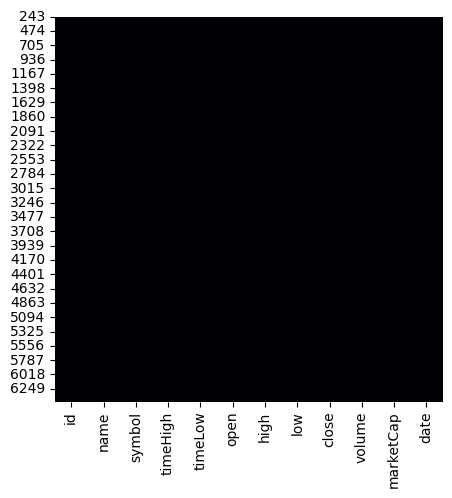

In [41]:
sns.heatmap(data_.isnull(),cmap = 'magma',cbar = False);

In [42]:
data_.head(10)

,id,name,symbol,timeHigh,timeLow,open,high,low,close,volume,marketCap,date
243,1,Bitcoin,BTC,00:51:02,19:11:01,763.280029,777.510010,713.599976,735.070007,46862700.0,8.955395e+09,2013-12-27
244,1,Bitcoin,BTC,12:06:01,18:11:01,737.979980,747.059998,705.349976,727.830017,32505800.0,8.869919e+09,2013-12-28
245,1,Bitcoin,BTC,21:46:02,04:41:01,728.049988,748.609985,714.440002,745.049988,19011300.0,9.082104e+09,2013-12-29
246,1,Bitcoin,BTC,20:46:02,00:51:01,741.349976,766.599976,740.239990,756.130005,20707700.0,9.217168e+09,2013-12-30
247,1,Bitcoin,BTC,00:56:02,04:26:02,760.320007,760.580017,738.169983,754.010010,20897300.0,9.191325e+09,2013-12-31
248,1,Bitcoin,BTC,23:46:02,00:01:02,754.969971,775.349976,754.969971,771.400024,22489400.0,9.403308e+09,2014-01-01
249,1,Bitcoin,BTC,21:31:03,15:01:02,773.440002,820.309998,767.210022,802.390015,38489500.0,9.781074e+09,2014-01-02
250,1,Bitcoin,BTC,13:41:02,03:16:01,802.849976,834.150024,789.119995,818.719971,37810100.0,9.980135e+09,2014-01-03
251,1,Bitcoin,BTC,23:56:02,04:21:01,823.270020,859.510010,801.669983,859.510010,38005000.0,1.047736e+10,2014-01-04
252,1,Bitcoin,BTC,19:26:01,02:06:01,858.549988,952.400024,854.520020,933.530029,72898496.0,1.137966e+10,2014-01-05


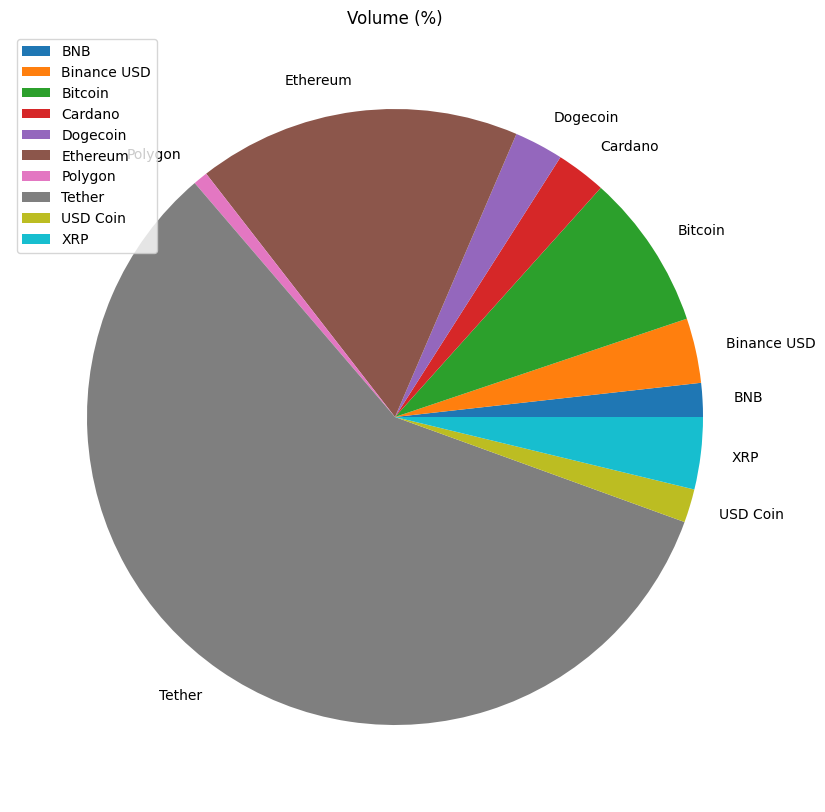

In [56]:
list_volume_avg=[]
list_id=sorted(Counter(data_['name']))
plt.rcParams["figure.figsize"] = (20,10)
for i in list_id:
    data_temp=list(data_[data_['name']==i]['volume'].values)
    list_volume_avg.append(sum(data_temp)/len(data_temp))
list_volume_avg_percent=[]
for i in list_volume_avg : 
    list_volume_avg_percent.append(i/sum(list_volume_avg))

plt.pie(list_volume_avg_percent,labels=list_id)
plt.title('Volume (%)')
plt.legend()
plt.show()

<AxesSubplot:>

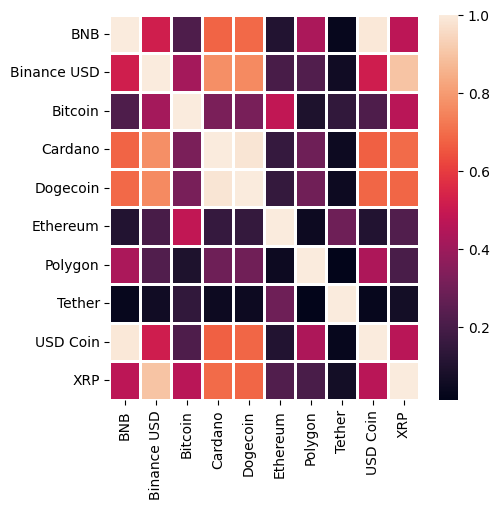

In [55]:
plt.rcParams["figure.figsize"] = (5,5)
list_volume_avg={}
list_id=sorted(Counter(data_['name']))
for i in list_id:
    data_temp=list(data_[data_['name']==i]['volume'].values)
    list_volume_avg[i]=sum(data_temp)/len(data_temp)
data_percent_coin={}
for i in list_volume_avg.keys():
    temp={}
    for j in list_volume_avg.keys():
        if(list_volume_avg[i]<list_volume_avg[j]):temp[j]=list_volume_avg[i]/list_volume_avg[j]
        else: temp[j]=list_volume_avg[j]/list_volume_avg[i]
    data_percent_coin[i]=temp
sns.heatmap(pandas.DataFrame(data_percent_coin),linewidths=2)

In [45]:
def select_month(object):
    return object[5:7]
def select_year(object):
    return object[0:4]

In [46]:
#Trung bình khối lượng theo từng tháng
def TB_Volume_Thang_ID(data_,ID):
    temp_df=data_[data_['id']==ID]
    data_by_month = temp_df[['volume','date']]
    data_by_month['month']=data_by_month['date'].apply(select_month)

    data_by_month['month']=data_by_month['month'].astype(int)
    dict_month={}
    for i in range(1,13):
        tmp=list(data_by_month[data_by_month['month']==i]['volume'])
        if(len(tmp)!=0):
            dict_month[i]=sum(tmp)/len(tmp)
        else:
            dict_month[i]=0
    return dict_month


    
#Trung bình khối lượng giao dịch theo từng năm 
def TB_Volume_Nam_ID(data_,ID):
    temp_df=data_[data_['id']==ID]
    data_by_year = temp_df[['volume','date']]
    data_by_year['year']=data_by_year['date'].apply(select_year)

    data_by_year['year']=data_by_year['year'].astype(int)
    dict_year={}
    for i in sorted(Counter(data_by_year['year'])):
        tmp=list(data_by_year[data_by_year['year']==i]['volume'])
        dict_year[i]=sum(tmp)/len(tmp)
    return dict_year



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15792\3031337962.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_month['month']=data_by_month['date'].apply(select_month)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15792\3031337962.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_month['month']=data_by_month['month'].astype(int)


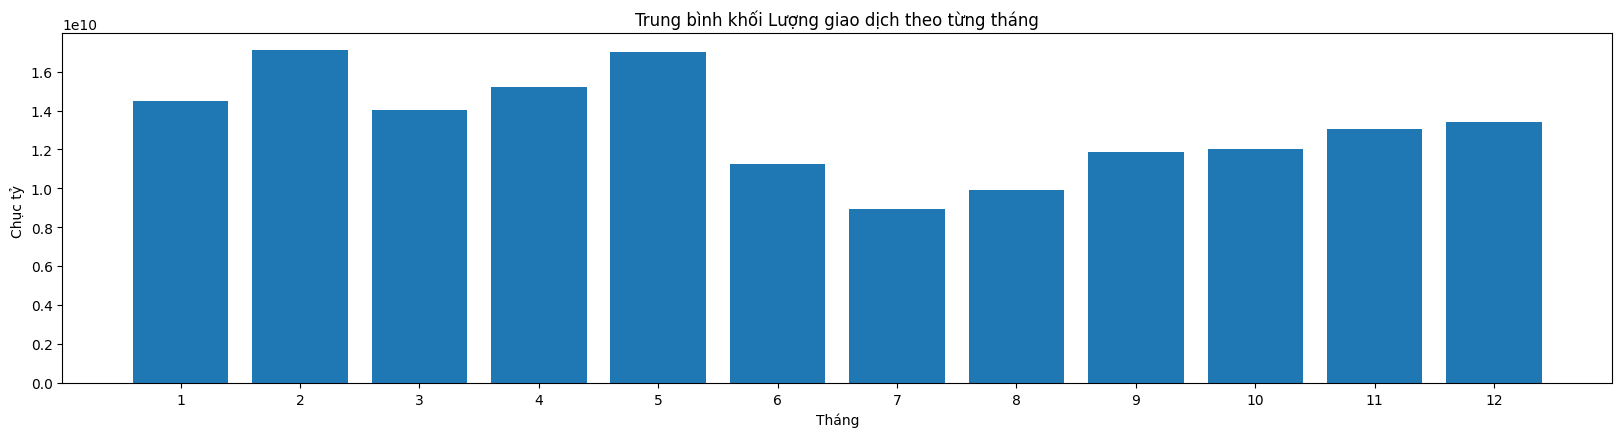

In [47]:
def draw_barchart_ID(data_,ID):
    dict_month=TB_Volume_Thang_ID(data_,ID)
    plt.rcParams["figure.figsize"] = (20,10)
    plt.subplot(2,1,1)
    plt.bar([str(i) for i in dict_month.keys()],list(dict_month.values()))
    plt.ylabel('Chục tỷ ')
    plt.xlabel('Tháng')
    plt.title('Trung bình khối Lượng giao dịch theo từng tháng')
draw_barchart_ID(data_,1)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15792\1939165301.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_month['month']=data_by_month['date'].apply(select_month)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15792\1939165301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_month['year']=data_by_month['date'].apply(select_year)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15792\1939165301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

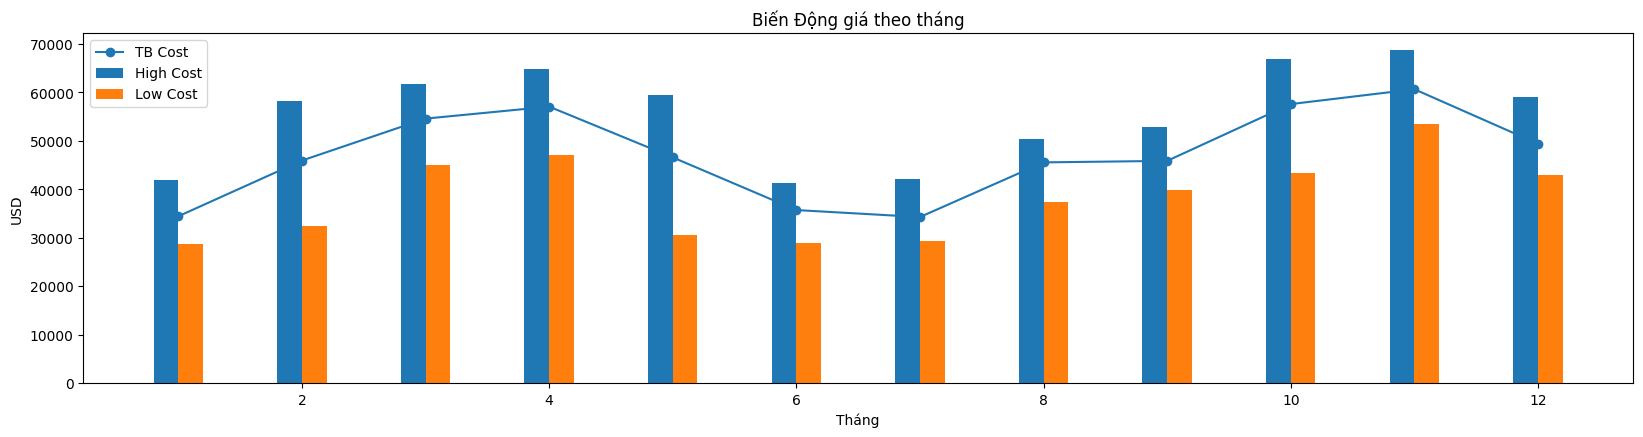

In [48]:
def TB_Cost_Thang_ID(data_,ID):
    temp_df=data_[data_['id']==ID]
    data_by_month = temp_df[['high','low','date']]
    data_by_month['month']=data_by_month['date'].apply(select_month)
    data_by_month['year']=data_by_month['date'].apply(select_year)
    data_by_month['month']=data_by_month['month'].astype(int)
    data_by_month['year']=data_by_month['year'].astype(int)
    data_by_month=data_by_month[data_by_month['year']==2021]
    dict_month={}
    for i in range(1,13):
        tmp_high=list(data_by_month[data_by_month['month']==i]['high'])
        tmp_low=list(data_by_month[data_by_month['month']==i]['low'])
        dict_month[i]=[max(tmp_high),min(tmp_low),(sum(tmp_low)+sum(tmp_high))/(len(tmp_low)*2)]
    return dict_month



    #Gọi hàm lấy data
def draw_change_cost_ID(data_,ID):
    dict_cost_bitcoin_month=TB_Cost_Thang_ID(data_,ID)
    [str(i) for i in dict_cost_bitcoin_month.keys()]
    plt.rcParams["figure.figsize"] = (20,10)
    np.array(list(dict_cost_bitcoin_month.values())).transpose()[0]
    plt.subplot(2,1,1)
    plt.bar(np.array(list(dict_cost_bitcoin_month.keys()))-float(0.1),np.array(list(dict_cost_bitcoin_month.values())).transpose()[0],width=0.2,label='High Cost')
    plt.bar(np.array(list(dict_cost_bitcoin_month.keys()))+float(0.1),np.array(list(dict_cost_bitcoin_month.values())).transpose()[1],width=0.2,label='Low Cost')
    plt.plot(np.array(list(dict_cost_bitcoin_month.keys())),np.array(list(dict_cost_bitcoin_month.values())).transpose()[2],label='TB Cost',marker='o')
    plt.legend()
    plt.title('Biến Động giá theo tháng')
    plt.ylabel('USD')
    plt.xlabel('Tháng')
draw_change_cost_ID(data_,1)




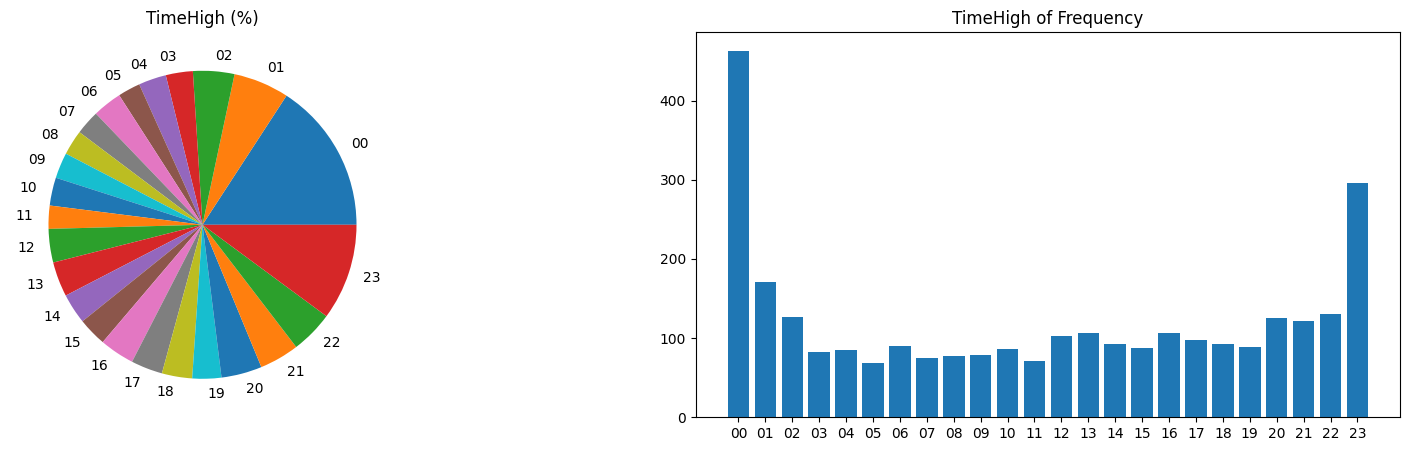

In [49]:
def draw_timehigh_ID(data_,ID):
    temp_df=data_[data_['id']==ID]
    list_time_high=[]# list time theo thời gian và phút
    for i in list(temp_df['timeHigh']):
        list_time_high.append(i[0:2])
    l=dict(sorted(Counter(list_time_high).items()))
    circle=[]
    sum_values_l=sum(l.values())
    for i in l.values():
        circle.append(i/sum_values_l)
    fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
    plt.subplot(1,2,1)
    plt.pie(circle,labels =list(l.keys()))
    plt.title('TimeHigh (%)')
    plt.subplot(1,2,2)
    plt.bar(list(l.keys()),list(l.values()))
    plt.title("TimeHigh of Frequency")
    plt.show()
draw_timehigh_ID(data_,1)

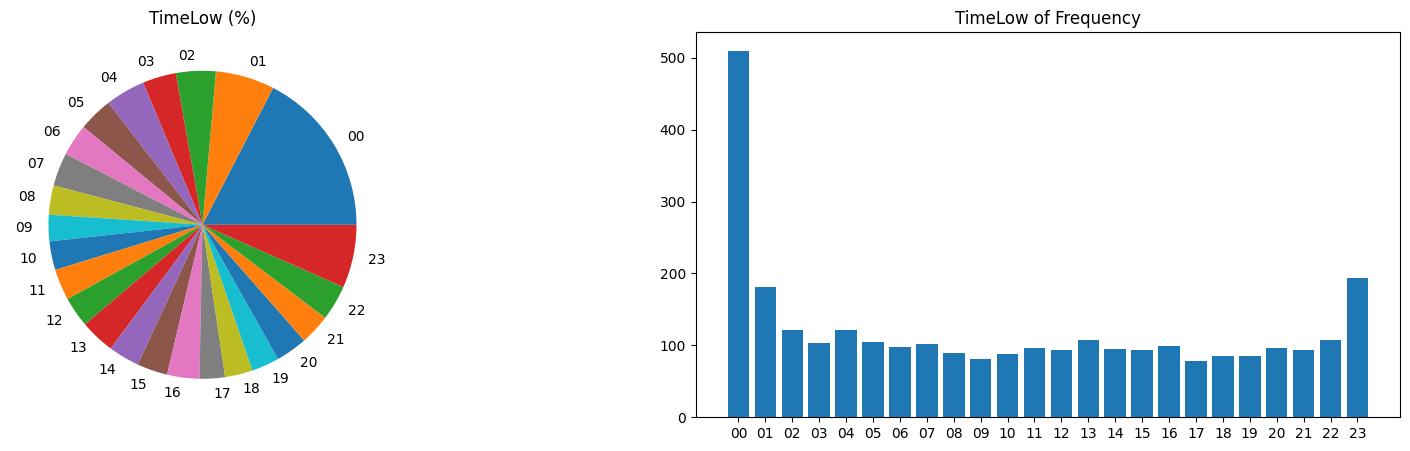

In [50]:
def draw_timelow_ID(data_,ID):
    temp_df=data_[data_['id']==ID]
    list_time_low=[]# list time theo thời gian và phút
    for i in list(temp_df['timeLow']):
        list_time_low.append(i[0:2])
    l=dict(sorted(Counter(list_time_low).items()))
    circle=[]
    sum_values_l=sum(l.values())
    for i in l.values():
        circle.append(i/sum_values_l)
    fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
    plt.subplot(1,2,1)
    plt.pie(circle,labels =list(l.keys()))
    plt.title('TimeLow (%)')
    plt.subplot(1,2,2)
    plt.bar(list(l.keys()),list(l.values()))
    plt.title("TimeLow of Frequency")
    plt.show()
draw_timelow_ID(data_,1)

***Biến Động Giá***

In [51]:
sorted(Counter(data_['id']))

[1, 52, 74, 825, 1027, 1839, 2010, 3408, 3890, 4687]

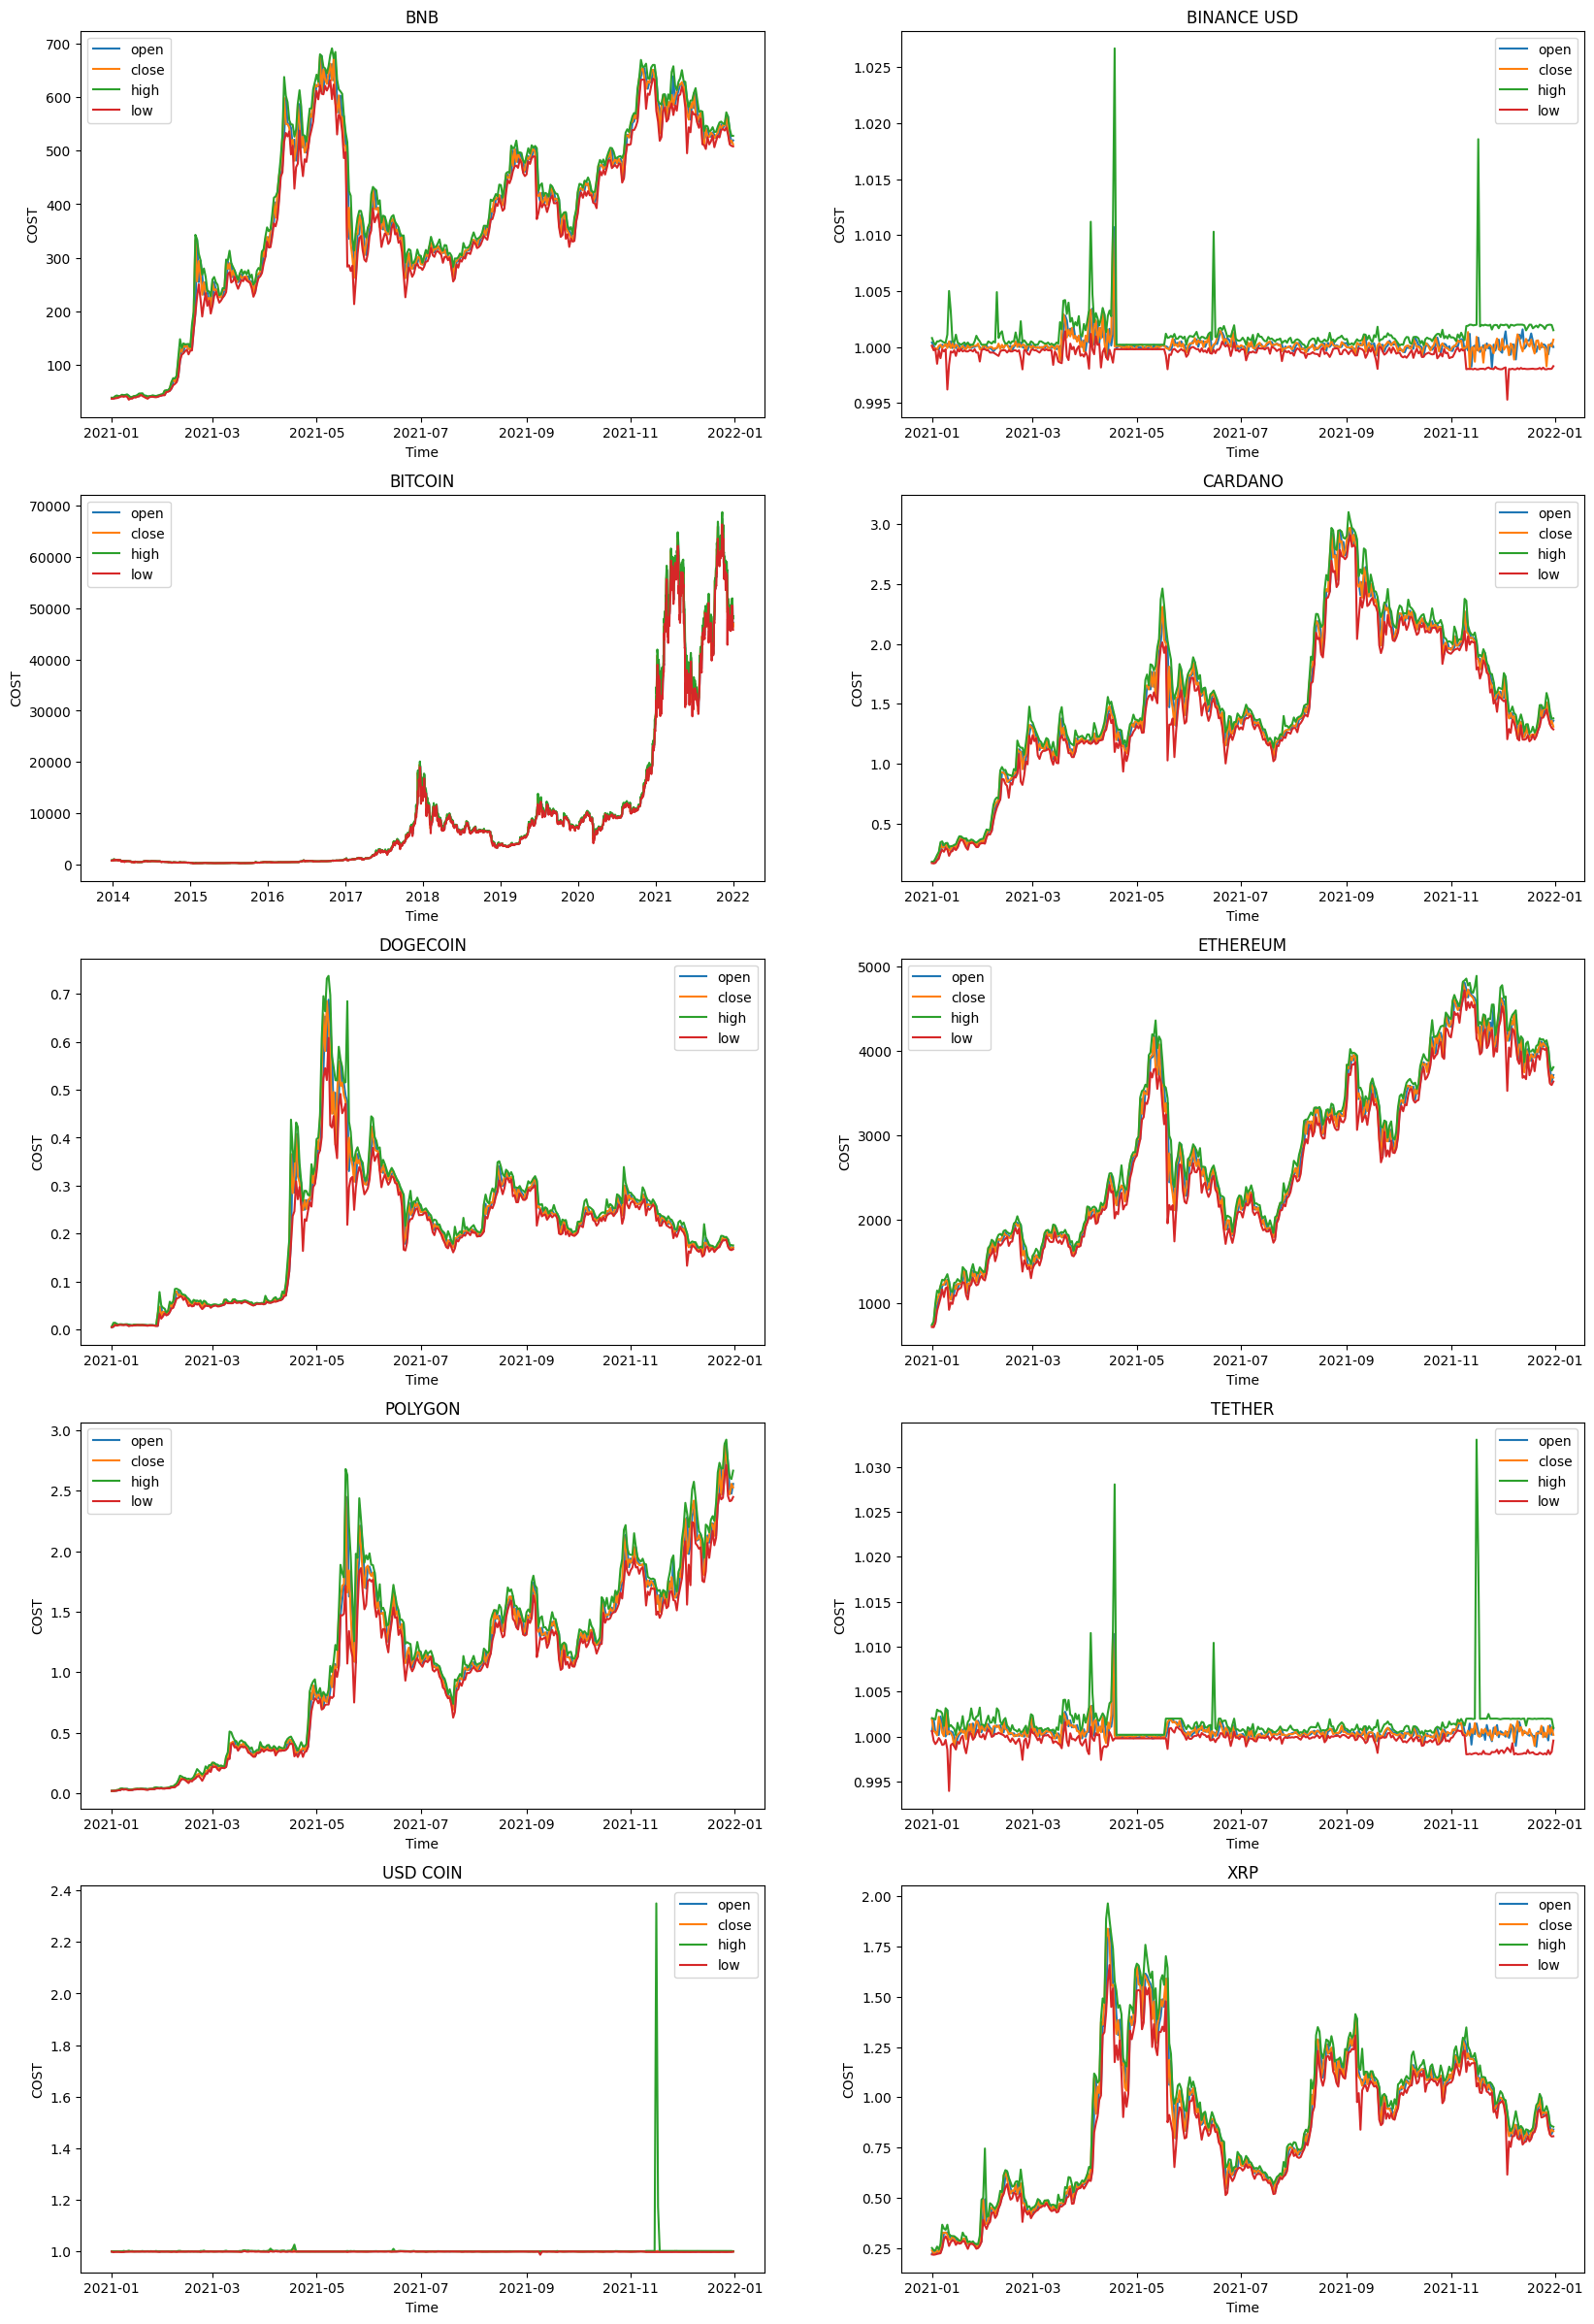

In [52]:
def BienDongGia():
    plt.rcParams["figure.figsize"] = (20,30)
    dem=1
    for i in sorted(Counter(data_['name'])):
        data_cryto=data_[data_['name']==i]
        plt.subplot(5,2,dem)
        plt.plot(pandas.to_datetime(data_cryto['date'], format="%Y-%m-%d").values,data_cryto['open'],label='open')
        plt.plot(pandas.to_datetime(data_cryto['date'], format="%Y-%m-%d").values,data_cryto['close'],label='close')
        plt.plot(pandas.to_datetime(data_cryto['date'], format="%Y-%m-%d").values,data_cryto['high'],label='high')
        plt.plot(pandas.to_datetime(data_cryto['date'], format="%Y-%m-%d").values,data_cryto['low'],label='low')
        plt.xlabel("Time")
        plt.ylabel("COST")
        plt.title(str(i).upper())
        dem+=1
        plt.legend()
    plt.show()
BienDongGia()



***Nến***

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15792\1780738463.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['year']=data_['date'].apply(select_year)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15792\1780738463.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['year']=data_['date'].apply(select_year)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15792\1780738463.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

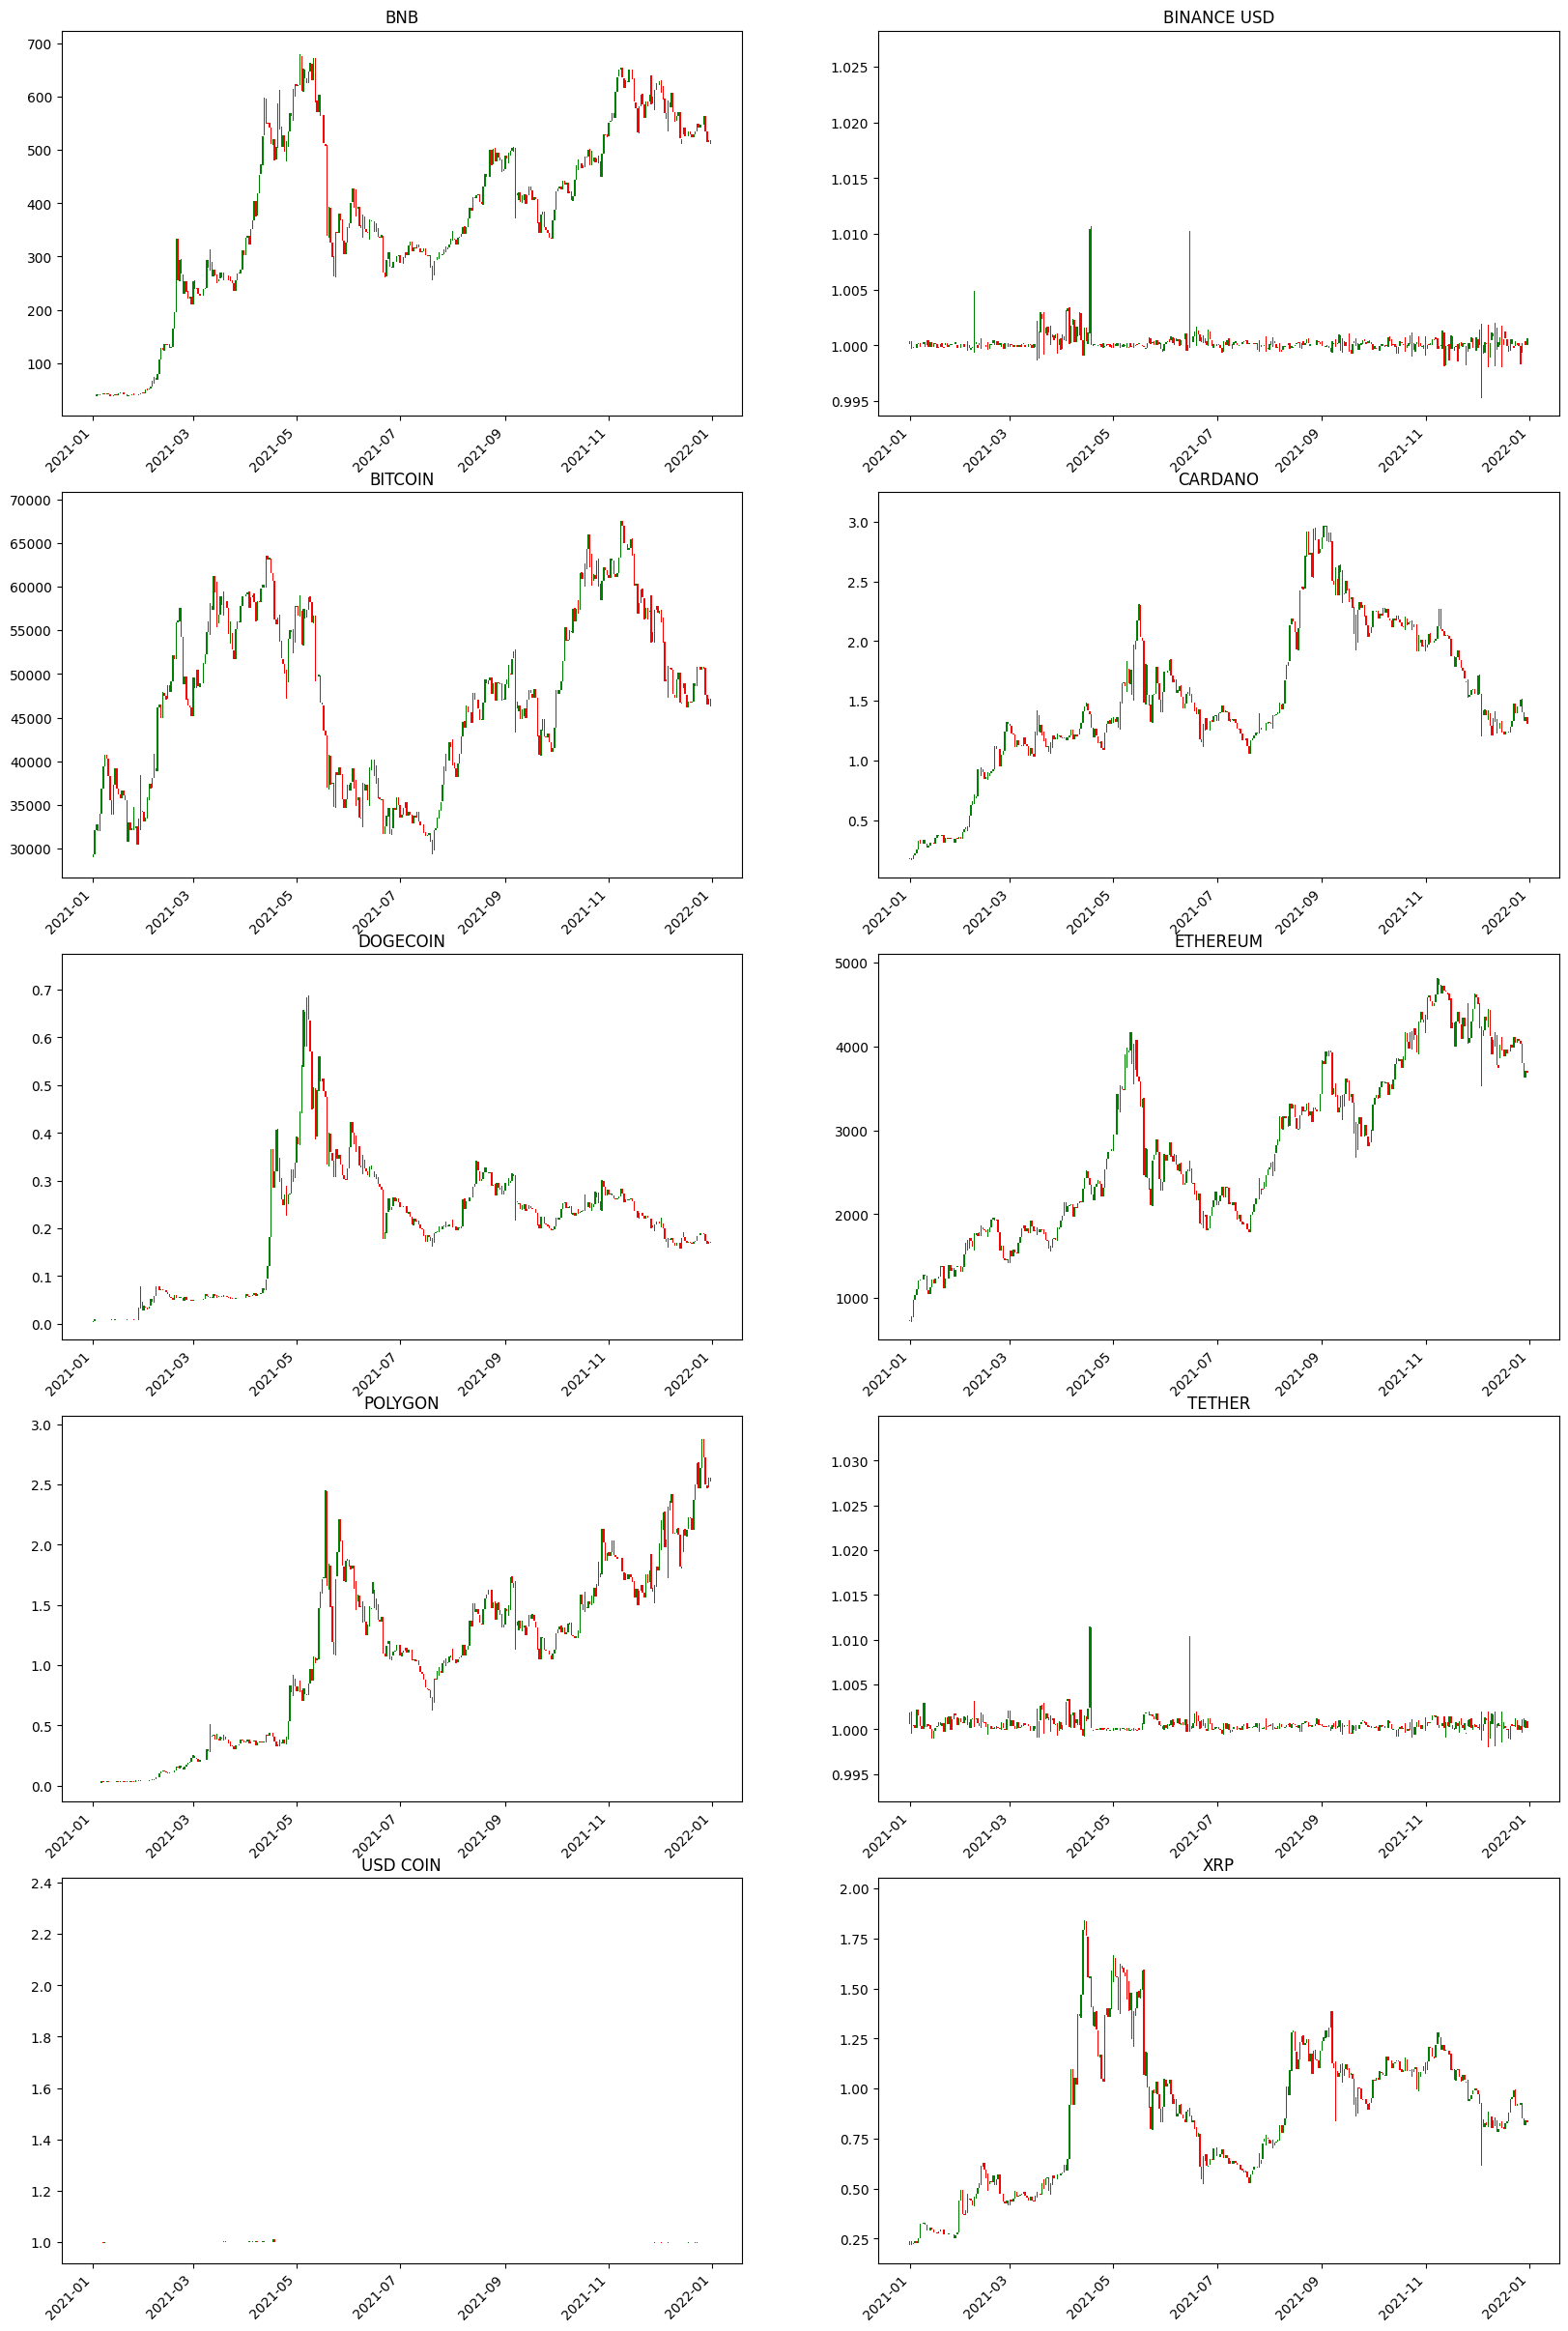

In [53]:
def candlestick_chart():
    plt.rcParams["figure.figsize"] = (20,30)
    width = 0.8
    width2 = 0.05
    col1 = 'green'
    col2 = 'red'
    dem=1
    for i in sorted(Counter(data_['name'])):
        plt.subplot(5,2,dem)
        data_2021=data_[data_['name']==i]
        data_2021['year']=data_['date'].apply(select_year)
        data_2021=data_2021[data_2021['year']=='2021']
        up = data_2021[data_2021['close']>=data_2021['open']]
        down = data_2021[data_2021['close']<data_2021['open']]
    #plot up prices
        plt.bar(pandas.to_datetime(up['date'], format="%Y-%m-%d"),up.close-up.open,width,bottom=up.open,color=col1)
        plt.bar(pandas.to_datetime(up['date'], format="%Y-%m-%d"),up.high-up.close,width2,bottom=up.close,color=col1)
        plt.bar(pandas.to_datetime(up['date'], format="%Y-%m-%d"),up.low-up.open,width2,bottom=up.open,color=col1)

#plot down prices
        plt.bar(pandas.to_datetime(down['date'], format="%Y-%m-%d"),down.close-down.open,width,bottom=down.open,color=col2)
        plt.bar(pandas.to_datetime(down['date'], format="%Y-%m-%d"),down.high-down.open,width2,bottom=down.open,color=col2)
        plt.bar(pandas.to_datetime(down['date'], format="%Y-%m-%d"),down.low-down.close,width2,bottom=down.close,color=col2)

#rotate x-axis tick labels
        plt.xticks(rotation=45, ha='right')
        plt.title(str(i).upper())
        dem+=1
#display candlestick chart
    plt.show()
candlestick_chart()




C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15792\157208545.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_year['year']=data_by_year['date'].apply(select_year)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15792\157208545.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_year['year']=data_by_year['year'].astype(int)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15792\157208545.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

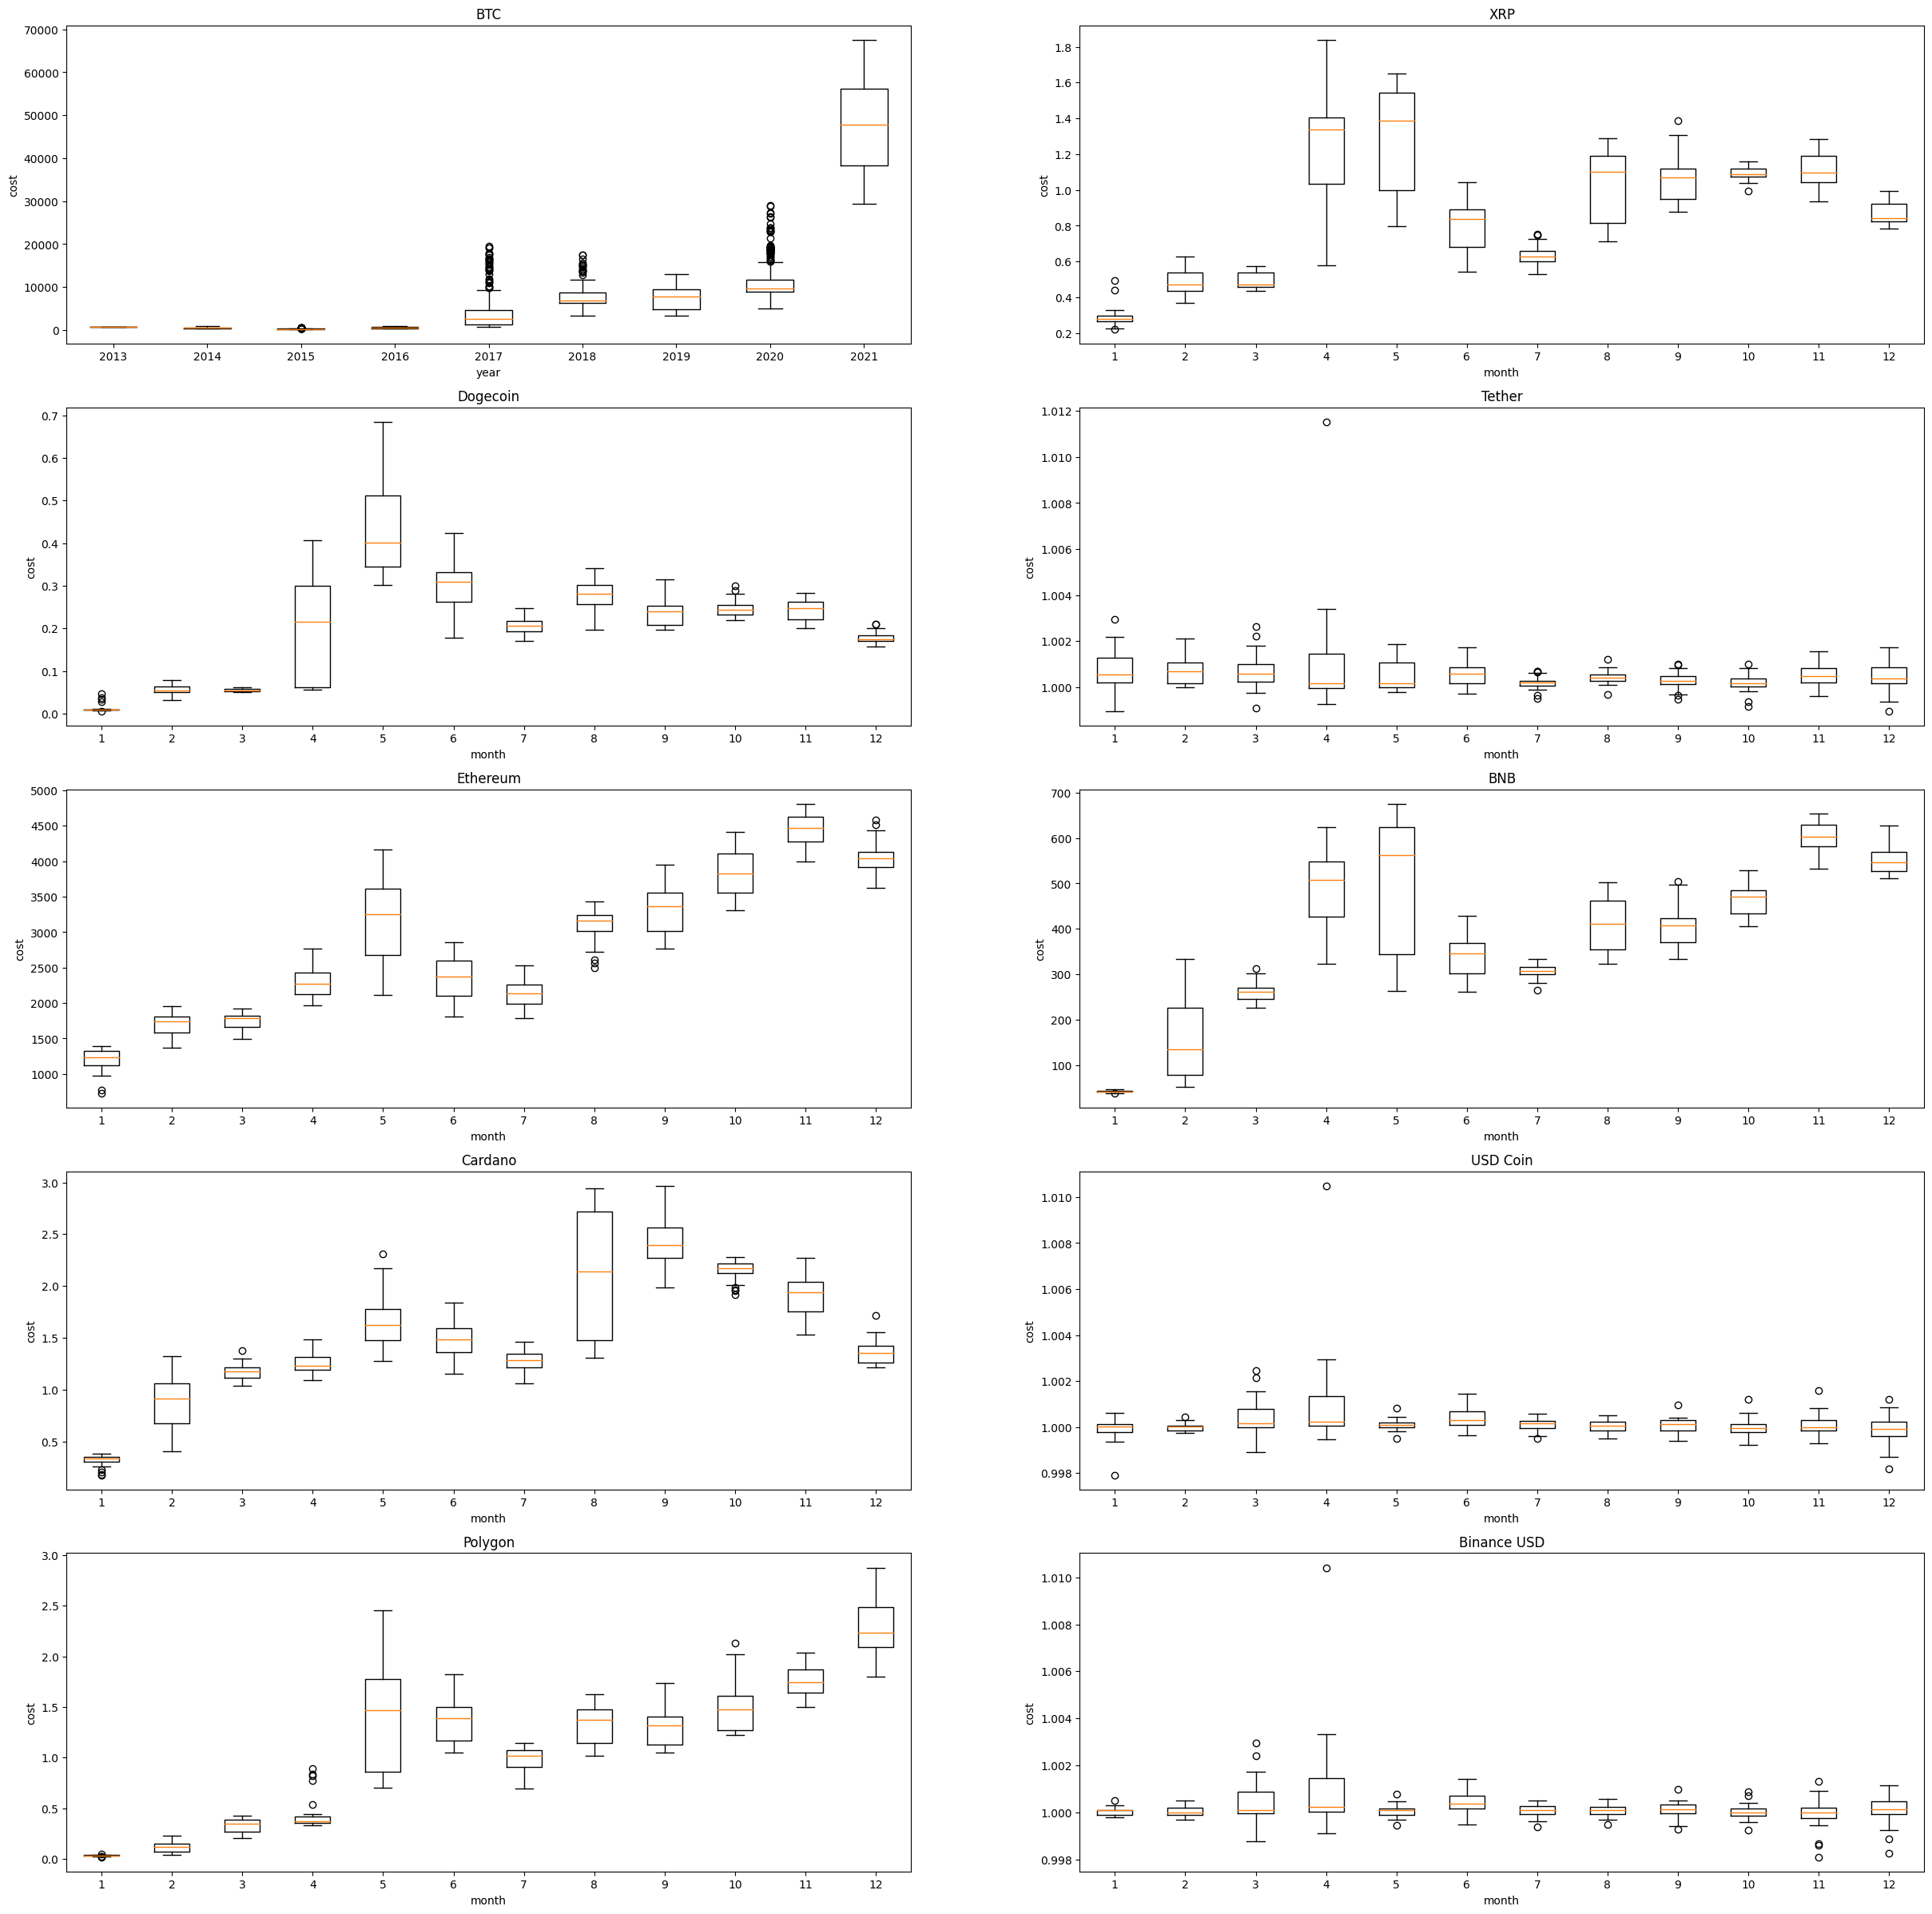

In [85]:
def central_cost ():
    plt.rcParams["figure.figsize"] = (30,30)
    list_id=sorted(Counter(data_['id']))
    list_name={}
    for i in list_id:
        list_name[i]=list(data_[data_['id']==i]['name'])[0]
    data=[]
    # Giá Coint BTC theo năm
    temp_df=data_[data_['id']==1]
    plt.subplot(5,2,1)
    data_by_year = temp_df[['close','date']]
    data_by_year['year']=data_by_year['date'].apply(select_year)
    data_by_year['year']=data_by_year['year'].astype(int)
    for j in sorted(Counter(data_by_year['year'])):
            data.append(data_by_year[data_by_year['year']==j]['close'])
    plt.boxplot(data,labels=sorted(Counter(data_by_year['year'])))
    plt.ylabel('cost')
    plt.xlabel('year')
    plt.title('BTC')
    
    # Coin Khác BTC 
    dem=2
    for i in list_id[1:]:
        plt.subplot(5,2,dem)
        temp_df=data_[data_['id']==i]
        data_by_month = temp_df[['close','date']]
        data_by_month['month']=data_by_month['date'].apply(select_month)
        data_by_month['month']=data_by_month['month'].astype(int)
        data=[]
        for j in sorted(Counter(data_by_month['month'])):
            data.append(data_by_month[data_by_month['month']==j]['close'])
        plt.boxplot(data)
        plt.ylabel('cost')
        plt.xlabel('month')
        plt.title(list_name[i])
        dem+=1
    plt.show()
central_cost()